# HR Analytics

# Part 1 - Define

The purpose of this project is to understand the factors that cause employees to leave their jobs.  Understanding this question is critical because companies spend significant amounts of time and money hiring new employees and training them to the needed level. 

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Part 2 - Discover

### Loading the data

In [3]:
df = pd.read_csv('HR-data.csv.txt', delimiter = ',')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Examing and Cleaning the Data

In [5]:
# Checking null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [41]:
#Renaming columns
df = df.rename(columns = {'satisfaction_level' : 'satisfaction',
           'last_evaluation' : 'evaluation',
           'number_project' : 'project_count',
           'time_spend_company' : 'years_at_company',
           'Work_accident' : 'work_accident',
           'left' : 'turnover',
           'promotion_last_5years' : 'promotion',
           'sales' : 'department',
           'average_montly_hours' : 'average_monthly_hours'})

df.head()

,satisfaction,evaluation,project_count,average_monthly_hours,years_at_company,work_accident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [42]:
# Separating dataframe based on column type
numeric_df = df.select_dtypes(include = [np.number])
cat_df = df.select_dtypes(include = ['O'])

In [43]:
# Statistics for numerical variables
df.describe(include = [np.number])

,satisfaction,evaluation,project_count,average_monthly_hours,years_at_company,work_accident,turnover,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [44]:
# Statistics for categorical variables
df.describe(include = ['O'])

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Exploratory Data Analysis

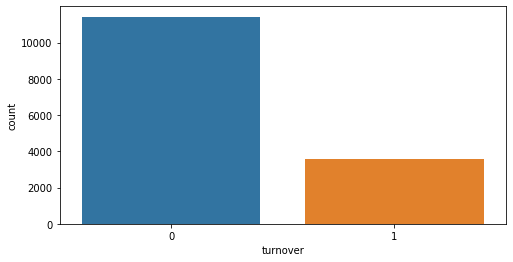

In [9]:
plt.figure(figsize = (8, 4))
sns.countplot(df['turnover'])
plt.show()

**Observation:**
There is a clear imbalance of employees who stayed (label 0) compared to those who left (label 1).  We will deal with the imbalance below. 

In [10]:
turnover_summary = df.groupby('turnover').mean()
turnover_summary

,satisfaction,evaluation,project_count,average_montly_hours,years_at_company,work_accident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Observation:**
Comparing the groups of employee who stayed versus those who left, employees who left typically had lower levels of satisfaction, had fewer work accidents, and were less promoted. 

### Plotting Numerical Variables 

In [55]:
def histograms_plot(df, features, rows, cols):
    fig = plt.figure(figsize = (20,20))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        df[feature].hist(bins = 20, ax = ax, facecolor = 'blue')
        ax.set_title(' {} DISTRIBUTION'.format(feature.upper().replace('_', ' ')), fontsize = 14)

    fig.tight_layout()  
    plt.show()

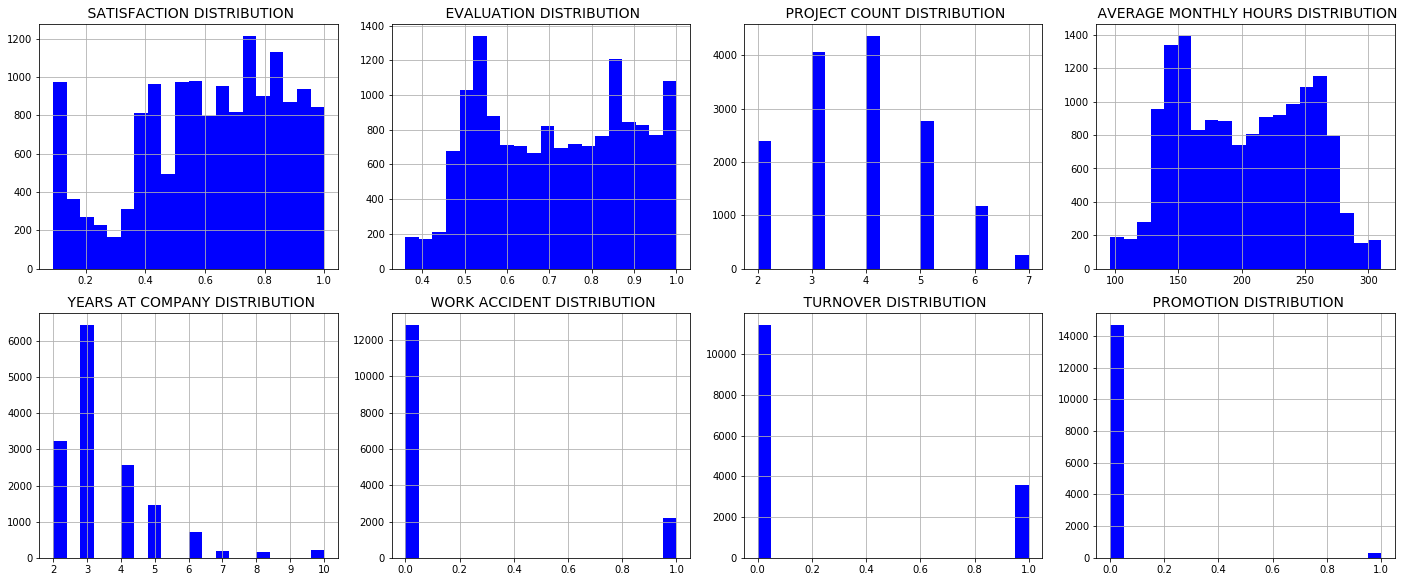

In [56]:
histograms_plot(numeric_df, numeric_df.columns, 5, 4)

**Observation:**

- In terms of satisfaction level, there is clearly a large group of employees who are not happy (satisfaction level < 0.2). 
- For evaluation level, there's a large number of employees who are not being evaluated as much as others.
- For average monthly hours, there are two peak groups.  One group averages 150 monthly hours and another group avearges 250 monthly hours.
- For the project count, project number tends to generally decrease after an employee takes on 4 projects.

We will compare these variables with respect to turnover and see if any trends are present. 

In [68]:
kde_var = ['satisfaction', 'evaluation', 'average_monthly_hours', 'project_count']

def kdeplot(df, features, dep_var, cond1, cond2, shade, label1, label2, rows, cols):
    fig = plt.figure(figsize = (20, 12))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax = sns.kdeplot(df.loc[(df[dep_var] == cond1), feature], color = 'blue', shade = shade, label = label1)
        ax = sns.kdeplot(df.loc[(df[dep_var] == cond2), feature], color = 'green', shade = shade, label = label2)
        plt.title('{} KDE PLOT'.format(feature.upper().replace('_', ' ')), fontsize = 14)

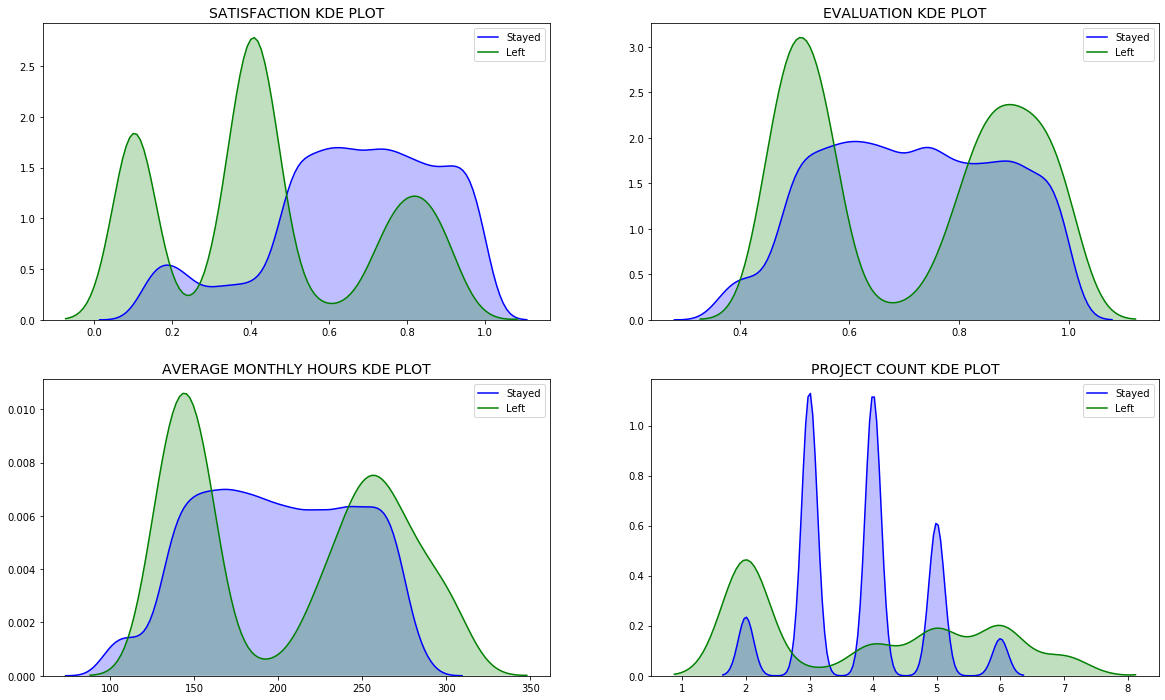

In [69]:
kdeplot(df, kde_var, 'turnover', 0, 1, True, 'Stayed', 'Left', 2, 2)

**Observations:**

- For the Satisfaction KDE, there are three clear peaks of satisfaction for employees who left (0.1, 0.4, 0.8 levels of satisfaction). 
- For the Evaluation KDE, there are two clear peaks for employees who left (evaluation levels of 0.5 and 0.9).
- For the Average Monthly Hours KDE, a good number of employees left who worked `150 hours or less` and those who worked `250 hours or more`.  Employees left either there **underworked** (not having work/projects to do) or **overworked** (stretched out to thin).  
- For the Project Count KDE, employees left when they had a lower project count compared a higher project count.  This illustrates that employees left because the company did not have work for them or they were not challenged at their position.

### Identifying Cluster Groups

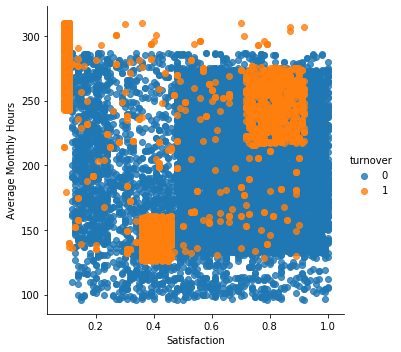

In [76]:
sns.lmplot(x = 'satisfaction', y = 'average_monthly_hours', data = df, fit_reg = False,
           hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Average Monthly Hours')
plt.show()

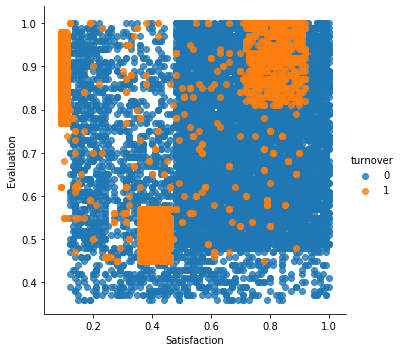

In [75]:
sns.lmplot(x = 'satisfaction', y = 'evaluation', data = df, fit_reg = False,
           hue = 'turnover')
plt.xlabel('Satisfaction')
plt.ylabel('Evaluation')
plt.show()

**Observation:**
From these plots, there are three distinct clusters:


**Cluster 1 (low satisfaction, high evaluation):**  For these employees, their satisfaction levels are around 0.1 but are evaluated very highly by management.  However, the same group of dissatisfied employees also work 250 monthly hours or more.  This shows that these employees are not happy because they are overworked and are not be recognized for their work.


**Cluster 2 (low-mid satisfaction, low evaluation):** These employees had satisfaction levels between 0.35 and 0.45 with evaluation levels between 0.45 and 0.55.  Additionally, these employees worked 150 hours per month or less.  These employees could have underformed from management standpoint since their evaluation scores were quite low.  Also, these employees had work volume on the low range.  They could have been part-time employees/contractors or full-time employees who were not given enough work to do.


**Cluster 3 (high satisfaction, high evaluation):** These employees had satisfaction levels between 0.70 and 0.90 along with evaluation levels greater than 0.8.  Additionally, these employees worked 250 hours per month or greater.  These employees could be classified as **'superstars'** of the company.  They could have left because they accomplished everything they could at their current position and left the company to pursue greater opportunities.  

### Correlation Matrix

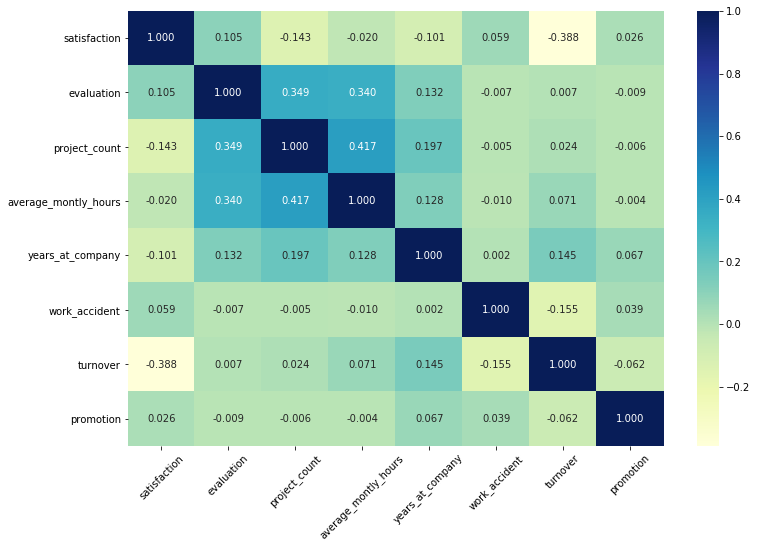

In [51]:
fig = plt.figure(figsize = (12, 8))
sns.heatmap(numeric_df.corr(), cmap = 'YlGnBu', annot = True, fmt = '0.3f')
plt.xticks(rotation = 45)
plt.show()